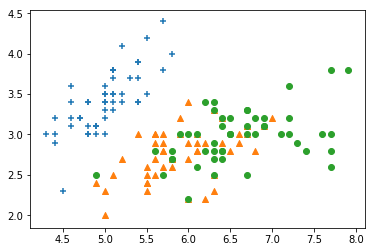

In [25]:
from sklearn import svm, datasets, neighbors
import matplotlib.pyplot as plt
# import seaborn as sns

iris = datasets.load_iris()
data = iris.data
target = iris.target


first_class = data[target == 0][:, 0]
second_class = data[target == 0][:, 1]

plt.scatter(data[target == 0][:, 0], data[target == 0][:, 1], marker="+")
plt.scatter(data[target == 1][:, 0], data[target == 1][:, 1], marker="^")
plt.scatter(data[target == 2][:, 0], data[target == 2][:, 1], marker="o")



# print(first_class)

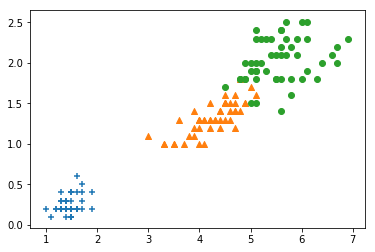

In [26]:
plt.scatter(data[target == 0][:, 2], data[target == 0][:, 3], marker="+")
plt.scatter(data[target == 1][:, 2], data[target == 1][:, 3], marker="^")
plt.scatter(data[target == 2][:, 2], data[target == 2][:, 3], marker="o")

In [27]:
# from sklearn import neighbors

cl = neighbors.KNeighborsClassifier(n_neighbors=3)
cl.fit(data[1:], target[1:])
cl.predict([data[0]])




array([0])

In [75]:
from sklearn import model_selection

import numpy as np
a = np.arange(10)
errors = []

kf = model_selection.KFold(n_splits=5, shuffle=True)
for tr, ts in kf.split(data):
    cl.fit(data[tr], target[tr])
    
    errors.append(sum(target[ts] != cl.predict(data[ts])))
# errors
#     cl.predict
#     print(tr, ts)

# cl.predict(data[ts] != target[ts])


a = 100 - sum(errors)/150 * 100
a

96.66666666666667

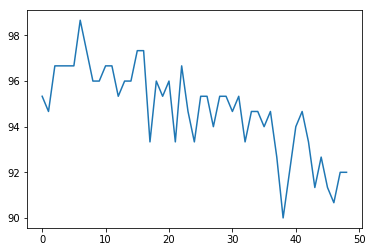

In [95]:
gl_errors = []

for i in range(1, 50):
    errors = 0
    cl = neighbors.KNeighborsClassifier(n_neighbors=i)
    for tr, ts in kf.split(data):
        cl.fit(data[tr], target[tr])
        errors += sum(target[ts] != cl.predict(data[ts]))
    gl_errors.append(100 - errors/len(data) * 100)
plt.plot(gl_errors)

In [100]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(data[1:], target[1:])

dt.predict([data[0]])

array([0])

In [135]:
errors = 0
for tr, ts in kf.split(data):
        cl.fit(data[tr], target[tr])
        errors += sum(target[ts] != cl.predict(data[ts]))
100 - errors/150*100

92.66666666666667